In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
import re
import string
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Hashir/movie.csv')

In [ ]:
df=df.iloc[:20000]

In [ ]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


# Steps involved

#### Following will be the steps involved in this project
1. Data Numerical Insights and Cleaning
2. EDA
3. Text Preprocessing
4. Feature Extraction/Vectorization
5. Model Development and Evaluation
6. Deployment on Streamlit Cloud

### Data Cleaning

In [ ]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
df.duplicated().sum()

67

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.isnull().sum()

text     0
label    0
dtype: int64

### EDA: Exploratory Data Analysis

In [ ]:
'''
For EDA we will perform following steps:
1. Length of words , sentences
2. Unique words
3. Bar and histplot
4. Word Clouds
and many more as we get along
'''
df['n_words']=df['text'].apply(lambda x: len([x for x in word_tokenize(x)]))
df['n_sentences']=df['text'].apply(lambda x: len([x for x in sent_tokenize(x)]))
df['total_length']=df['text'].apply(len)

In [ ]:
df.head()

,text,label,n_words,n_sentences,total_length
0,I grew up (b. 1965) watching and loving the Th...,0,174,17,874
1,"When I put this movie in my DVD player, and sa...",0,393,14,1811
2,Why do people who do not know what a particula...,0,205,9,983
3,Even though I have great interest in Biblical ...,0,76,5,351
4,Im a die hard Dads Army fan and nothing will e...,1,223,9,983


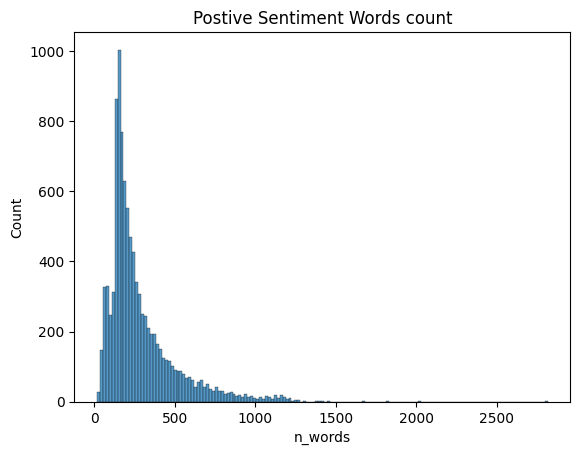

In [ ]:
sns.histplot(df[df['label']==1]['n_words']) # Showing words count for positive sentiment 1
plt.title('Postive Sentiment Words count')
plt.show()

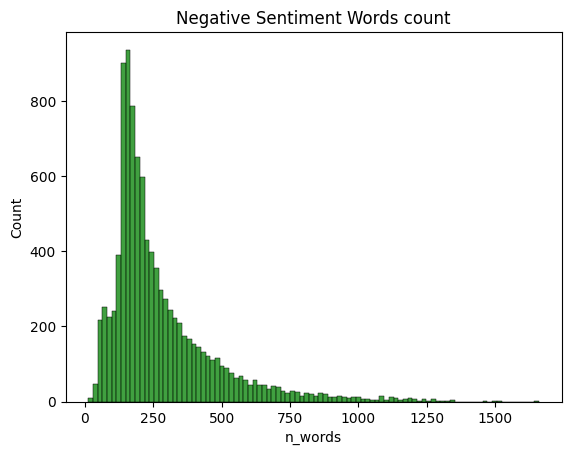

In [ ]:
sns.histplot(df[df['label']==0]['n_words'],color='green') # Showing words count for positive sentiment 1
plt.title('Negative Sentiment Words count')
plt.show()

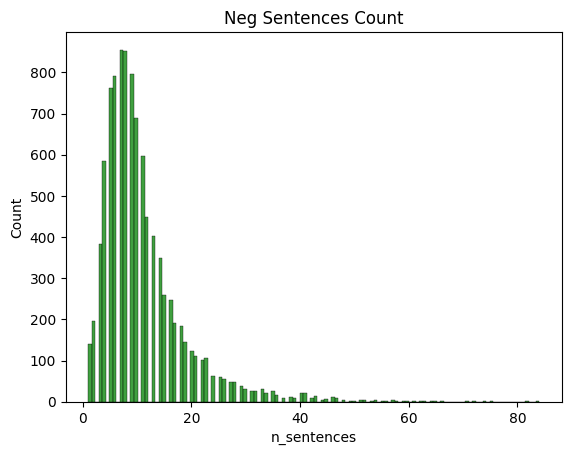

In [ ]:
sns.histplot(df[df['label']==0]['n_sentences'],color='green') # Showing words count for positive sentiment 0
plt.title('Neg Sentences Count')
plt.show()

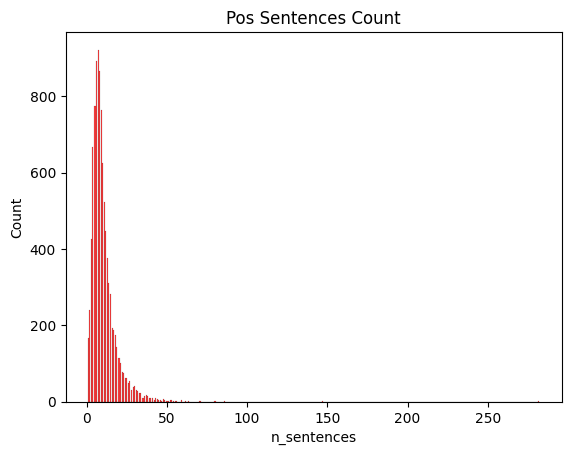

In [ ]:
sns.histplot(df[df['label']==1]['n_sentences'],color='red') # Showing words count for positive sentiment 0
plt.title('Pos Sentences Count')
plt.show()

In [ ]:
df['n_words'].describe()

count    19933.000000
mean       279.612402
std        206.254472
min         12.000000
25%        151.000000
50%        210.000000
75%        342.000000
max       2818.000000
Name: n_words, dtype: float64

In [ ]:
df[df['label']==1]['n_words'].describe()

count    9956.000000
mean      281.933909
std       214.385521
min        16.000000
25%       148.000000
50%       209.000000
75%       346.000000
max      2818.000000
Name: n_words, dtype: float64

In [ ]:
df[df['label']==0]['n_words'].describe()

count    9977.000000
mean      277.295780
std       197.791257
min        12.000000
25%       153.000000
50%       211.000000
75%       339.000000
max      1661.000000
Name: n_words, dtype: float64

#### We will plot the barplot and wordCount after text_preprocessing

### Text Preprocessing

In [ ]:
'''
Now we will use text preprocessing which includes the following steps
1. Lowercase all letters (You can also UPPER case all letters but mostly lowercase are used)
2. Remove punctuation or any special character
3. Removal of stopwords
4. Removal of HTML or any others tags if any
5. Stemming or Lemmatization

Here are the most basic and important one , we will look side by side if we need any
'''
stemmer=PorterStemmer()
def preprocess_text(text):
  text=text.lower()
  sentences=sent_tokenize(text)
  sentences=[re.sub(r'<[^>]*>', '', sent) for sent in sentences]
  sentences=[word_tokenize(sent) for sent in sentences]
  clean_tokens=[]
  for tokens in sentences:
    tokens=[token.translate(str.maketrans('','',string.punctuation)) for token in tokens]
    tokens=[token for token in tokens if token not in stopwords.words('english') and token!='']
    tokens=[token for token in tokens if token.isalpha()]
    tokens=[stemmer.stem(token) for token in tokens]
    clean_tokens.append(tokens)
  return " ".join(token for tokens_list in clean_tokens for token in tokens_list)
  # return token

In [ ]:
df['clean_text']=df['text'].apply(preprocess_text)

#### We forgot to write the html cleaning code so lets implement it separately

In [ ]:
df.to_csv('movie_cleaned.csv')

#### Dataset is almost balanced so we are good to go

In [ ]:
df['label'].value_counts()

0    9977
1    9956
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

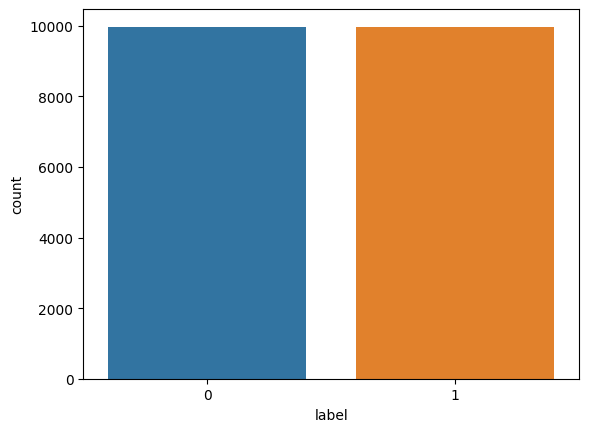

In [ ]:
sns.countplot(x='label',data=df)

In [ ]:
df.head()

,text,label,n_words,n_sentences,total_length,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,174,17,874,grew b watch love thunderbird mate school watc...
1,"When I put this movie in my DVD player, and sa...",0,393,14,1811,put movi dvd player sat coke chip expect hope ...
2,Why do people who do not know what a particula...,0,205,9,983,peopl know particular time past like feel need...
3,Even though I have great interest in Biblical ...,0,76,5,351,even though great interest biblic movi bore de...
4,Im a die hard Dads Army fan and nothing will e...,1,223,9,983,im die hard dad armi fan noth ever chang got t...


In [ ]:
df['clean_text'][0]

'grew b watch love thunderbird mate school watch play thunderbird school lunch school want virgil scott one want alan count becam art form took children see movi hope would get glimps love child bitterli disappoint high point snappi theme tune could compar origin score thunderbird thank earli saturday morn one televis channel still play rerun seri gerri anderson wife creat jonatha frake hand director chair version complet hopeless wast film utter rubbish cgi remak may accept replac marionett homo sapien subsp sapien huge error judgment'

#### Now we will plot the barplot and word counts

In [ ]:
from wordcloud import WordCloud
word_count = WordCloud(width=1000,height=800,min_font_size=12,background_color='black')

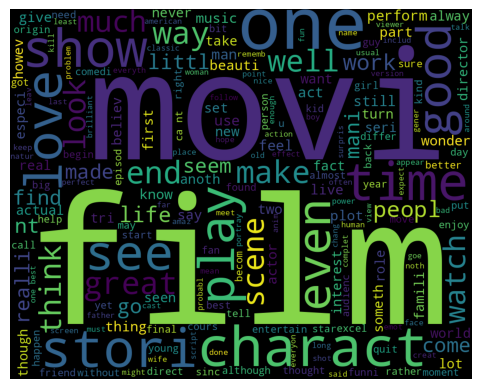

In [ ]:
word_count_positive = word_count.generate(df[df['label'] == 1]['clean_text'].str.cat(sep=" ")) # Generating for positive
plt.imshow(word_count_positive)
plt.axis('off')
plt.show()

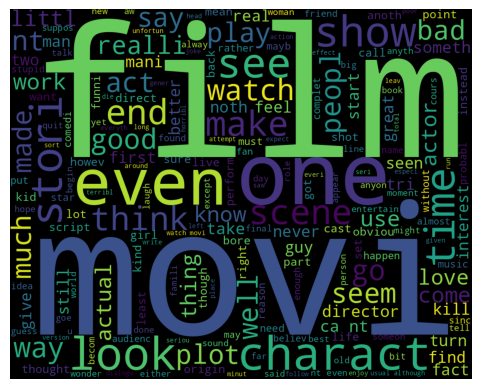

In [ ]:
word_count_positive = word_count.generate(df[df['label'] == 0]['clean_text'].str.cat(sep=" ")) # Generating for negative sentiment
plt.imshow(word_count_positive)
plt.axis('off')
plt.show()

In [ ]:
pos_corpus = [word  for text in df[df['label'] == 1]['clean_text'].tolist() for word in text.split()]
neg_corpus =  [word  for text in df[df['label'] == 0]['clean_text'].tolist() for word in text.split()]
print(len(pos_corpus), len(neg_corpus))

1194743 1155305


In [ ]:
from collections import Counter # Counter will be used to make the dictionary of words as keys and their frequencies as values
# We are doing this because we want to obtain 20 or 30 most frequent words and want to plot them
pos_dict=Counter(pos_corpus)
neg_dict=Counter(neg_corpus)

In [ ]:
pos_dataFrame=pd.DataFrame(pos_dict.most_common(20))
neg_dataFrame=pd.DataFrame(neg_dict.most_common(20))

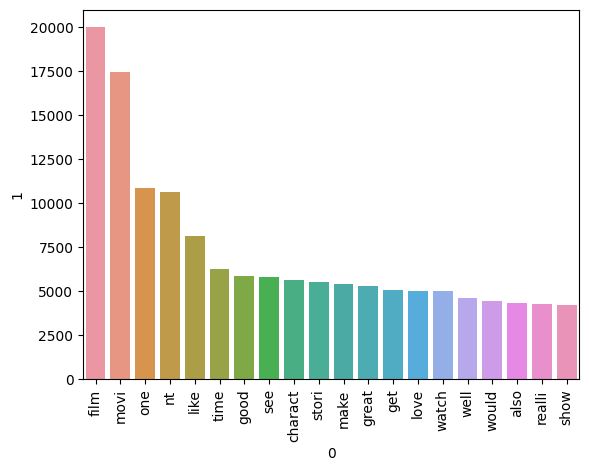

In [ ]:
sns.barplot(x=pos_dataFrame[0],y=pos_dataFrame[1])
plt.xticks(rotation='vertical')
plt.show()

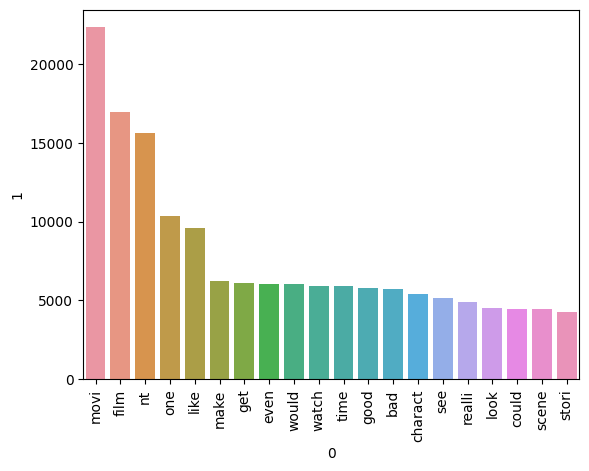

In [ ]:
sns.barplot(x=neg_dataFrame[0],y=neg_dataFrame[1])
plt.xticks(rotation='vertical')
plt.show()

#### Now we are done with our EDA and Text Preprocessing , So now lets move to feature extraction or vectorization part

# Feature Extraction / Vectorization

#### We will use Machine Learning techniques here which includes Tfidf and bow

In [ ]:
df.shape

(19933, 6)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
cv=CountVectorizer(min_df = 5)
x_cv=cv.fit(df['clean_text'])

In [ ]:
x_cv=cv.transform(df['clean_text'])

In [ ]:
x_cv=x_cv.toarray()

In [ ]:
x_cv.shape

(19933, 17436)

In [ ]:
y_cv=df['label'].values

In [ ]:
import pickle
pickle.dump(cv,open('count_vectorizer.pkl','wb'))

In [ ]:
tfidf=TfidfVectorizer(min_df = 5)
x_tfidf=tfidf.fit(df['clean_text'])

In [ ]:
x_tfidf=tfidf.transform(df['clean_text'])

In [ ]:
x_tfidf=x_tfidf.toarray()

In [ ]:
y=df['label'].values

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train_cv,x_test_cv,y_train_cv,y_test_cv=train_test_split(x_cv,y_cv,train_size=0.8,random_state=42)

In [66]:
x_train_tf,x_test_tf,y_train_tf,y_test_tf=train_test_split(x_tfidf,y,train_size=0.8,random_state=42)

In [ ]:
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
lr = LogisticRegression(solver='liblinear', penalty='l1')
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [ ]:
algos={
    'MNB':mnb,
    'GNB':gnb,
    'BNB':bnb,
    'SVC':svc,
    'KNC':knc,
    'LR':lr,
    'DTC':dtc,
    'RFC':rfc,
    'ABC':abc,
    'XGB':xgb,
    'BC':bc,
    'ETC':etc
}

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [55]:
print('Hello')

Hello


In [56]:
'''
I will be using 3 models
1. MNB
2. ETC
3. KNC
4. XGBOOST
'''

array([1, 1, 0, ..., 1, 0, 0])

In [59]:
mnb.fit(x_train_cv,y_train_cv)

MultinomialNB()

In [60]:
etc.fit(x_train_cv,y_train_cv)

ExtraTreesClassifier(n_estimators=50, random_state=2)

In [61]:
knc.fit(x_train_cv,y_train_cv)

KNeighborsClassifier()

In [63]:
ypred_mnb=mnb.predict(x_test_cv)
ypred_knc=knc.predict(x_test_cv)
ypred_etc=etc.predict(x_test_cv)

In [65]:
print(f'MNB: acc: {accuracy_score(y_test_cv,ypred_mnb)},prec: {precision_score(y_test_cv,ypred_mnb)}')
print(f'ETC: acc: {accuracy_score(y_test_cv,ypred_etc)},prec: {precision_score(y_test_cv,ypred_etc)}')
print(f'KNC: acc: {accuracy_score(y_test_cv,ypred_knc)},prec: {precision_score(y_test_cv,ypred_knc)}')

MNB: acc: 0.8354652621018309,prec: 0.8428496595075956
ETC: acc: 0.8337095560571859,prec: 0.8462765957446808
KNC: acc: 0.6232756458490093,prec: 0.616978271854472


In [67]:
knc.fit(x_train_tf,y_train_tf)
etc.fit(x_train_tf,y_train_tf)
mnb.fit(x_train_tf,y_train_tf)

MultinomialNB()

In [68]:
ypred_mnb=mnb.predict(x_test_tf)
ypred_knc=knc.predict(x_test_tf)
ypred_etc=etc.predict(x_test_tf)

In [69]:
print(f'MNB: acc: {accuracy_score(y_test_tf,ypred_mnb)},prec: {precision_score(y_test_tf,ypred_mnb)}')
print(f'ETC: acc: {accuracy_score(y_test_tf,ypred_etc)},prec: {precision_score(y_test_tf,ypred_etc)}')
print(f'KNC: acc: {accuracy_score(y_test_tf,ypred_knc)},prec: {precision_score(y_test_tf,ypred_knc)}')

MNB: acc: 0.8429897165788813,prec: 0.8421052631578947
ETC: acc: 0.836468522698771,prec: 0.8406850025947068
KNC: acc: 0.7389014296463506,prec: 0.7094288304623754


In [71]:
import pickle
pickle.dump(tfidf,open('tfidf_vectorizer.pkl','wb'))

In [72]:
pickle.dump(mnb,open('model_mnb_rev,pkl','wb'))

In [75]:
transformed_sms = preprocess_text("That movie was weird")
vector_input = tfidf.transform([transformed_sms])
result = mnb.predict(vector_input)[0]

In [76]:
result

0

#### We will use mnb as our model for streamlit